# Проект I

## Анализ застройки и землепользования

#### **Цель:**

1. Визуализировать данные о застройке и землепользовании для выбранного района города
2. Рассчитать долю застроенной территории
3. Отобразить структуру землепользования

#### **Шаги:**

1. **Выберите район** (например: "Хамовники, Москва")
   Для Москвы и Санкт-Петербурга не будет проблем с выгрузкой границ района, так как они являются единицами административного деления. Для других городов – нужно проверять
2. **Загрузите данные**:
   - Здания (`osmnx.features_from_place` с тегом `building`).
   - Землепользование (`osmnx.features_from_place` с тегом `landuse`).
3. **Рассчитайте долю застроенной территории**:
   - (Площадь всех зданий / площадь района) × 100%.
4. **Постройте график**:
   - Круговую диаграмму структуры землепользования

#### **Требования к итоговому результату:**

- Две картосхемы: застройки (1) и типов землепользования (2)
- Значение доли застройки в %
- График с категориями землепользования
- Сохраненный результат в виде иллюстрации в любом графическом формате (jpg, png или др.)

##### **Формат сдачи задания:**

- Документ в формате .ipynb
- Итоговая визуализация в виде одного или нескольких изображений (jpg, png или др.)

##### **Критерии оценивания (max. 10 баллов)**

**1. Корректность данных (2 балла)**

- **1 балл** – Получены данные о зданиях (`building`) без ошибок.
- **1 балл** – Получены данные о землепользовании (`landuse`) без ошибок.

**2. Расчеты и анализ (2 балла)**

- **1 балл** – Правильно вычислена доля застроенной территории (%).
- **1 балл** – Построена круговая диаграмма структуры землепользования.

**3. Визуализация (2 балла)**

- **1 балл** – Создана картосхема застройки (здания).
- **1 балл** – Создана картосхема типов землепользования.

**4. Оформление итогового результата (4 балла)**

- **1 балл** – Сданный код структурирован и читаем
- **до 3 баллов** – Отличная итоговая визуализация (читаема, есть все основные элементы на картосехемах, отображены итоговые расчеты)


## Примерный ход работы


### Шаг 1: Импортируем библиотеки


In [5]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

### Шаг 2: Выгружаем данные о застройке и землепользовании из OSM


In [6]:
# Определяем имя для поиска
place_name = 'район Выхино-Жулебино, Москва, Россия' # тут имя рассматриваемого района в кавычках

# Загружаем границу района
district = ox.geocode_to_gdf(place_name)

buildings = ox.features_from_place(place_name, tags={'building': True})
landuse = ox.features_from_place(place_name, tags={'landuse': True})

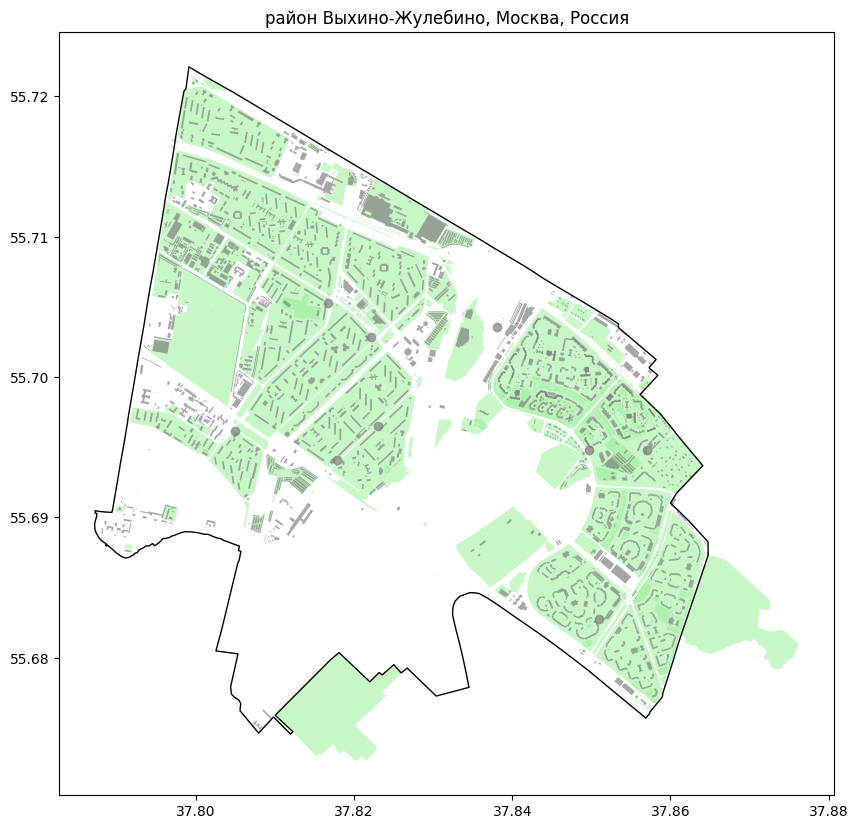

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
district.boundary.plot(ax=ax, color="black", linewidth=1)
landuse.plot(ax=ax, color="lightgreen", alpha=0.5)
buildings.plot(ax=ax, color="gray", alpha=0.7)
plt.title(place_name)
plt.show()

### Шаг 3: Перепроецируем данные в нужнную UTM-зону


In [5]:
# Определяем UTM-зону
data_crs = ox.projection.project_gdf(district).crs

# Перепроецируем данные 
district_utm = ox.projection.project_gdf(district)
buildings_utm = ox.projection.project_gdf(buildings)
landuse_utm = ox.projection.project_gdf(landuse)

### Шаг 4: Вычисляем площадь района


In [6]:
area_district = district_utm.geometry.area


# #Смотрим на результат
print(f"Площадь района: {area_district[0]} м²")

Площадь района: 15093568.471406378 м²


### Шаг 5: Вычисляем площадь зданий


In [7]:
buildings_utm['area'] = buildings_utm.geometry.area
buildings_area = buildings_utm['area'].sum()

#Смотрим на результат
print(f"Площадь застроенной территории: {buildings_area} м²")

Площадь застроенной территории: 1523677.3474047077 м²


### Шаг 6: Вычисляем долю застроенной территории


In [8]:
built_share = (buildings_area / area_district) * 100

#Смотрим на результат
print(f"Площадь застроенной территории: {built_share[0]:.2f} %")

Площадь застроенной территории: 10.09 %


### Шаг 7: Вычисляем площадь по разным типам землепользования

In [9]:
landuse_utm["area"] = landuse_utm.geometry.area
summary = landuse_utm.groupby('landuse')['area'].sum()
print("Площадь по типам землепользования (м²):\n")
for landuse_type, area in summary.items():
    print(f"{landuse_type:20s}: {area:.0f} м²")

Площадь по типам землепользования (м²):

brownfield          : 14463 м²
cemetery            : 442518 м²
commercial          : 43752 м²
construction        : 149627 м²
flowerbed           : 3540 м²
forest              : 724 м²
garages             : 318169 м²
grass               : 434458 м²
industrial          : 961118 м²
landfill            : 1962 м²
military            : 431970 м²
recreation_ground   : 264 м²
religious           : 24946 м²
residential         : 5816595 м²
retail              : 99267 м²


### Шаг 8: Визуализируем карты и график


/var/folders/nm/ynlmw5414tz2dxrz5mz952vc0000gn/T/ipykernel_9204/1224169512.py:10: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  landuse_utm.plot(ax=ax_map, column="landuse",


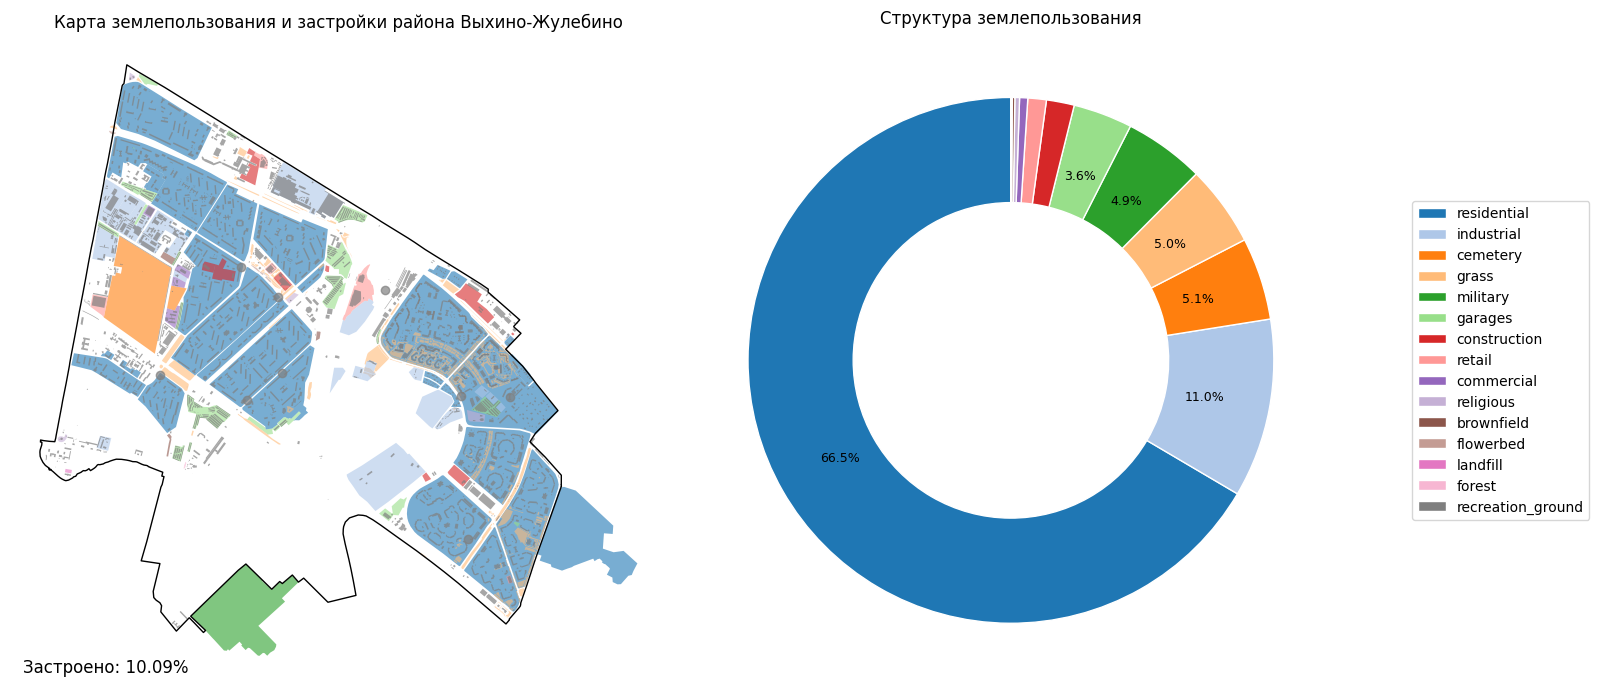

In [ ]:
summary_sorted = summary.sort_values(ascending=False)

landuse_colors = plt.cm.tab20.colors
unique_landuses = summary_sorted.index
color_map = dict(zip(unique_landuses, landuse_colors[:len(unique_landuses)]))

fig, (ax_map, ax_pie) = plt.subplots(1, 2, figsize=(16, 8))

district_utm.boundary.plot(ax=ax_map, color="black", linewidth=1)
landuse_utm.plot(ax=ax_map, column="landuse",
                 color=landuse_utm["landuse"].map(color_map),
                 alpha=0.6, legend=False)
buildings_utm.plot(ax=ax_map, color="gray", alpha=0.7)
ax_map.set_title("Карта землепользования и застройки района Выхино-Жулебино", fontsize=12)
ax_map.axis("off")

built_share_value = float(built_share.iloc[0])

ax_map.text(
    0.02, 0.02,
    f"Застроено: {built_share_value:.2f}%",
    transform=ax_map.transAxes,
    fontsize=12,
    color="black",
    bbox=dict(facecolor="white", alpha=0.7, edgecolor="none", boxstyle="round,pad=0.4")
)

wedges, texts, autotexts = ax_pie.pie(
    summary_sorted,
    colors=[color_map[l] for l in summary_sorted.index],
    autopct=lambda p: f"{p:.1f}%" if p > 2 else '',
    startangle=90,
    pctdistance=0.75,
    wedgeprops=dict(width=0.4, edgecolor='white'),
    textprops={'fontsize': 9}
)

ax_pie.set_title('Структура землепользования', fontsize=12)

ax_pie.legend(summary_sorted.index, loc="center left", bbox_to_anchor=(1.1, 0.5))

plt.tight_layout()
plt.show()


Найдите решение следующих задач:

- Как можно **одновременно** отобразить **карту** и **график** на одном изображении?
- Как **добавить значение доли застроенной территории** прямо на карту?
- Как **синхронизировать цвета** типов землепользования на карте и на круговой диаграмме?
- Как сделать **всю** информацию на круговой диаграмме читаемой
